In [54]:
import os
import cv2
import json
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [181]:
# if your dataset is in COCO format, this cell can be replaced by the following three lines:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [(x, y) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]
            # [x1, y1, ..., xn, yn]
            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": 
                ".XYXY_ABS",
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts


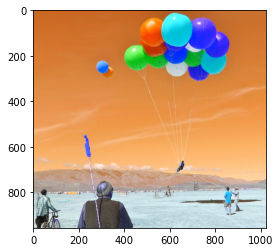

In [187]:
dataset_dicts = get_balloon_dicts("balloon/train")
random.seed(12345)
for d in random.sample(dataset_dicts, 1):
    img = cv2.imread(d["file_name"])
    # visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    # out = visualizer.draw_dataset_dict(d)
    plt.imshow(img)
    plt.show()

In [192]:
d['annotations']

[{'bbox': [757, 94, 863, 208],
  'bbox_mode': '.XYXY_ABS',
  'segmentation': [[807,
    94,
    819,
    96,
    835,
    100,
    849,
    112,
    859,
    128,
    863,
    142,
    863,
    157,
    860,
    171,
    854,
    186,
    847,
    194,
    826,
    205,
    808,
    208,
    791,
    207,
    771,
    195,
    760,
    182,
    757,
    173,
    773,
    164,
    786,
    155,
    796,
    141,
    805,
    118,
    807,
    107,
    807,
    94]],
  'category_id': 0},
 {'bbox': [682, 34, 808, 173],
  'bbox_mode': '.XYXY_ABS',
  'segmentation': [[776,
    42,
    788,
    52,
    797,
    62,
    804,
    78,
    808,
    93,
    807,
    109,
    803,
    126,
    798,
    137,
    790,
    149,
    778,
    160,
    767,
    168,
    758,
    173,
    738,
    173,
    717,
    170,
    696,
    158,
    688,
    147,
    682,
    139,
    695,
    121,
    700,
    100,
    702,
    77,
    700,
    60,
    695,
    51,
    709,
    40,
    726,
    35,
    744,
   

In [13]:
img = cv2.imread(d['file_name'], cv2.IMREAD_UNCHANGED)

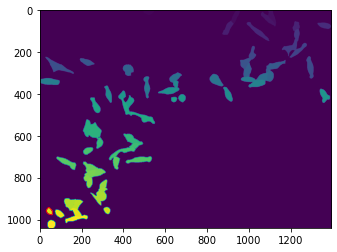

In [158]:
# Use contour to find polygon representation of cell mask
from skimage import measure
from skimage import img_as_float
from scipy.spatial import ConvexHull
img = cv2.imread('./AG2021/MasksLabeled/MasksLabeled_C5_1_2020y06m19d_02h33m.tif', cv2.IMREAD_UNCHANGED)
contours = measure.find_contours(img_as_float(img==66), 0.5)
hull = []
for contour in contours:
    hull+=contour[ConvexHull(contour).vertices].tolist()
hull = np.array(hull)
plt.imshow(img)
plt.plot(hull[:,1]+0.5, hull[:,0]+0.5, linewidth=1, c='red')

In [160]:
np.concatenate(contour[ConvexHull(contour).vertices])

array([953. ,  55.5, 941.5,  44. , 942.5,  41. , 943.5,  39. , 947. ,
        35.5, 950. ,  33.5, 956. ,  30.5, 958. ,  30.5, 961. ,  31.5,
       967. ,  34.5, 971.5,  39. , 972.5,  41. , 973.5,  44. , 976.5,
        54. , 976.5,  58. , 976. ,  58.5, 974. ,  59.5, 961. ,  59.5,
       958. ,  58.5, 956. ,  57.5])

In [190]:
# Make sure that the same representation is used for the other dataset
contour = d['annotations'][1]['segmentation'][1]
img = cv2.imread(d['file_name'])
x = contour[0::2]
y = contour[1::2]
plt.imshow(img)
plt.plot(x,y, linewidth=3, c='black')

IndexError: list index out of range

In [223]:
# def getCellDicts(imgDir):
imgDir = './AG2021/MasksFinal/Train'
baseDir = './AG2021'
# Get training information
imgs = os.listdir(imgDir)
imgs = [img for img in imgs if img.endswith('.csv')]

# Gather information for each image
datasetDicts = []
for idx, img in enumerate(imgs):
    # Information for the whole image
    record = {}
    imgBase = '_'.join(img.split('_')[1:])[:-4]
    phaseContrastName = os.path.join(baseDir, 'PhaseContrast','PhaseContrast_'+imgBase+'.jpg')
    height, width = cv2.imread(phaseContrastName).shape[:2]
    
    record['file_name'] = phaseContrastName
    record['image_id'] = idx
    record['height'] = height
    record['width'] = width
    
    # Cell information is stored in a .csv
    # Load the corresponding image, and store its information
    annos = pd.read_csv(os.path.join(imgDir, img))
    imgMaskName = os.path.join(baseDir, 'MasksLabeled', 'MasksLabeled_'+imgBase+'.tif')
    imgMask = cv2.imread(imgMaskName, cv2.IMREAD_UNCHANGED)
    objs = []
    for maskLabel, fluorescence in zip(annos['maskLabel'], annos['fluorescence']):
        # Contour converts the mask to
        contours = measure.find_contours(img_as_float(imgMask==maskLabel), .5)
        hull = []
        for contour in contours:
            hull+=contour[ConvexHull(contour).vertices].tolist()
        hull = np.array(hull)[ConvexHull(hull).vertices]
        
        px = hull[:,1]
        py = hull[:,0]
        poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
        poly = [p for x in poly for p in x]

        obj = {
            "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
            "bbox_mode": 
            "",
            # .XYXY_ABS,
            "segmentation": [poly],
            "category_id": 0,
        }
        objs.append(obj)
    record["annotations"] = objs
    datasetDicts.append(record)

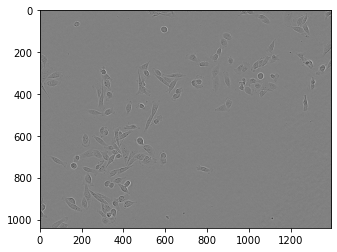

In [224]:
random.seed(12345)
for d in random.sample(datasetDicts, 1):
    img = cv2.imread(d["file_name"])
    # visualizer = Visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    # out = visualizer.draw_dataset_dict(d)
    plt.imshow(img)
    plt.show()

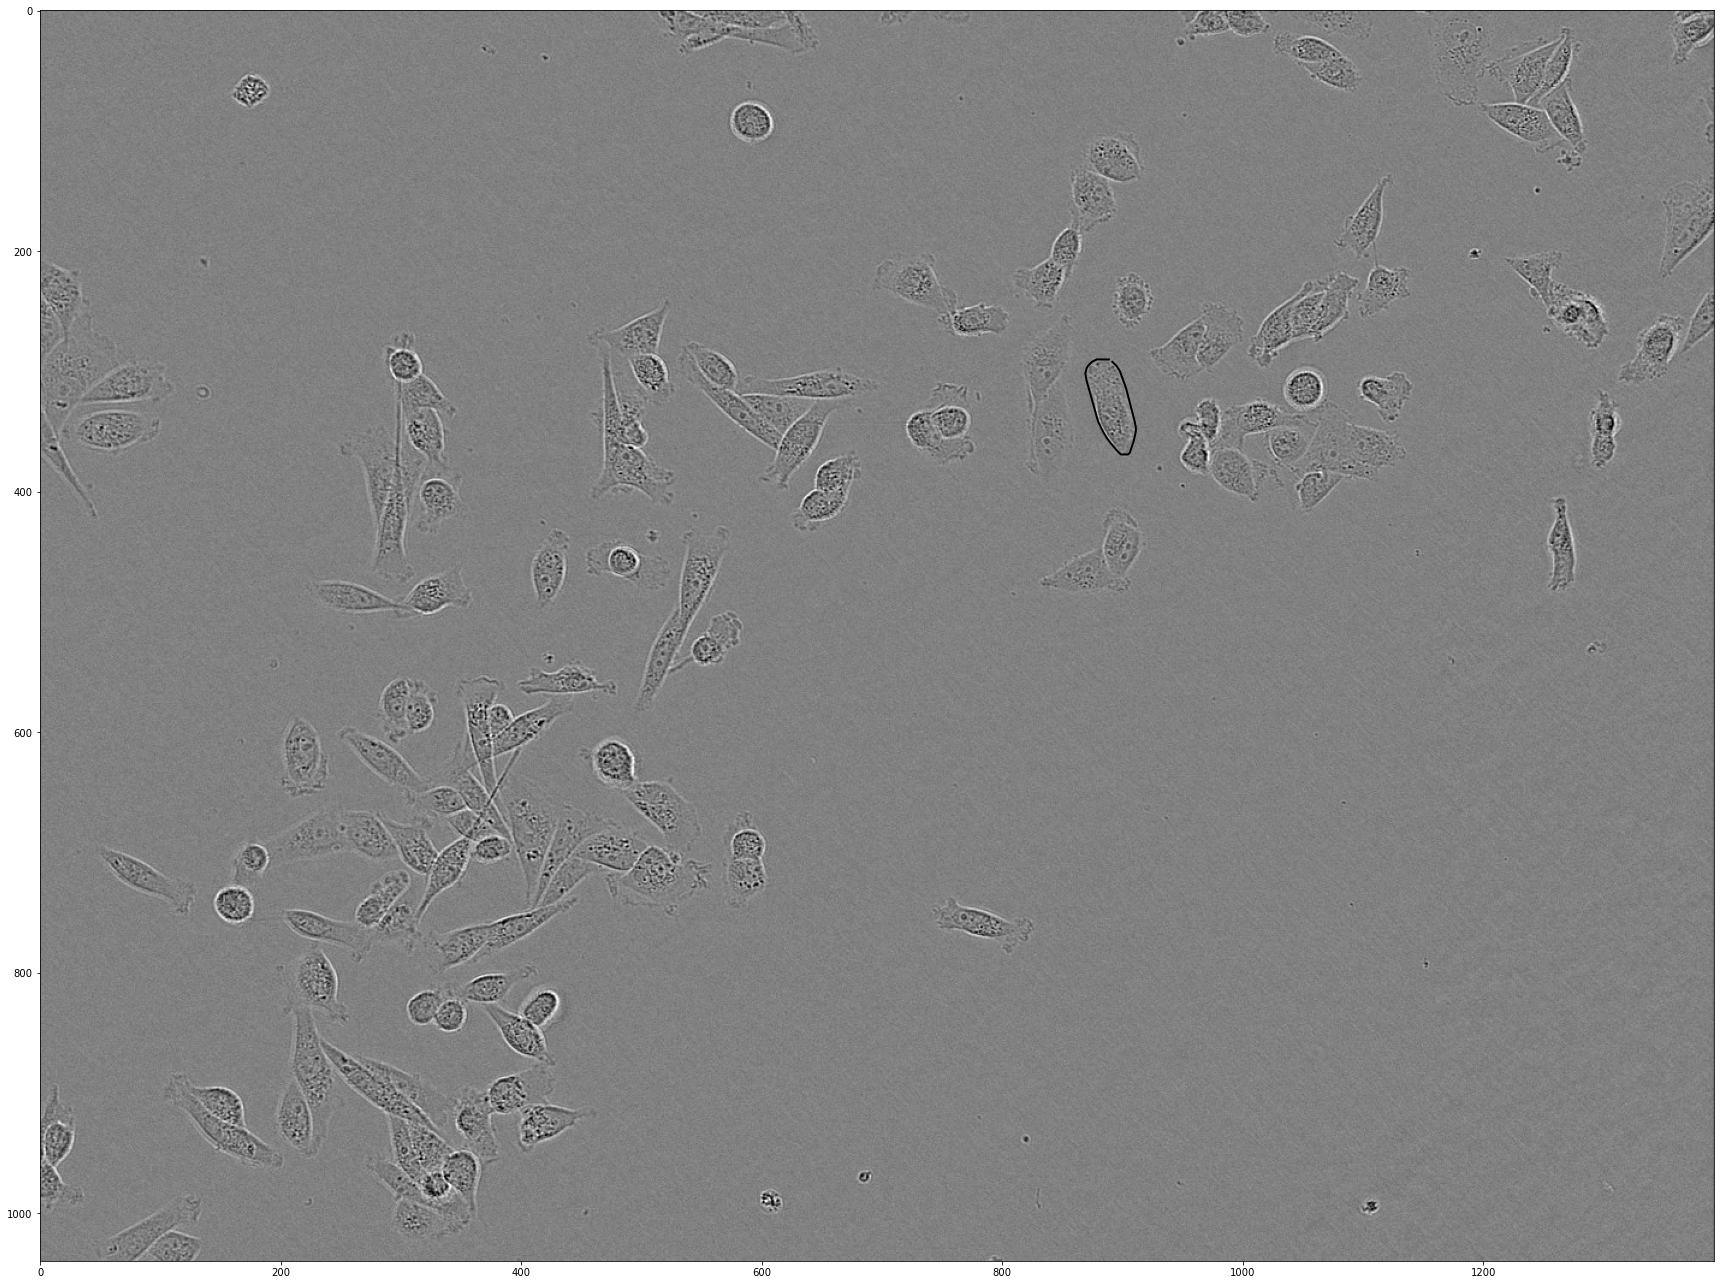

In [227]:
contour = d['annotations'][30]['segmentation'][0]
img = cv2.imread(d['file_name'])
x = contour[0::2]
y = contour[1::2]
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.plot(x,y, linewidth=2, c='black')